
# P-Lab 1: Python Practice - Programming Pac‑Man’s World

**Focus:** Functions · Conditionals · Loops (`for`/`while`) · Lists · Dictionaries · Tuples  
**Context:** All tasks are themed around a simple Pac‑Man‑style grid to prepare you for the Lab 1 - Intelligent Agent.

For each exercise, read the question and complete the code in cell.

---


## 1) Conditional Control and Decision-Making in Agent Behaviour

In this task, students simulate a simplified Pac-Man agent operating in a grid-based environment.
The agent perceives the state of its surroundings and determines an appropriate action according to predefined behavioural rules.

The environment provides four perceptual variables:

| Variable        | Type    | Description                                                        |
| --------------- | ------- | ------------------------------------------------------------------ |
| `ghost_visible` | Boolean | Indicates whether a ghost is within visual range.          |
| `energy`        | Integer | Represents Pac-Man’s current strength level.                        |
| `food_nearby`   | Boolean | Signals the presence of edible pellets adjacent to Pac-Man.        |
| `fruit`         | Boolean | Denotes the appearance of a special fruit item (highest priority). |

Pac-Man’s decision-making hierarchy is defined as follows:
- If a fruit is present (fruit == True) → perform "eat fruit".
- Else if a ghost is visible and energy < 30 → perform "hide".
- Else if a ghost is visible and energy ≥ 30 → perform "run".
- Else if no ghost is visible and food is nearby → perform "eat".
- Otherwise → perform "wander".

**Task**

Write a Python program that evaluates the current environmental state and determines Pac-Man’s next action based on the rule hierarchy above.

**Expected Output**

```python
Pac-Man action: run
```

In [1]:
ghost_visible = False
energy = 45
food_nearby = False
fruit = False

# Determine Pac-Man’s behaviour
action = None

# TODO: Implement the decision rules here

print("Pac-Man action:", action)

Pac-Man action: None



## 2) Iterative Structures and Environment Scanning Using For Loops

In a Pac-Man-inspired environment, the world is represented as a two-dimensional grid, implemented as a list of lists in Python. Each cell in the grid contains one of several possible symbols:

| Symbol | Meaning                         |
| :----: | :------------------------------ |
|  `'#'` | Wall (impassable obstacle).     |
|  `'.'` | Food pellet.                    |
|  `' '` | Empty space (no food, no wall). |

Pac-Man must analyze the environment to count the total number of food pellets available at a given state.
This operation models an environment scanning process, in which an agent iteratively inspects sensory input to compute a global summary of relevant features.

**Task**

Write a Python program that iterates through a two-dimensional maze and counts all occurrences of the symbol `'.'` (representing food).

You should use nested `for` loops, in which one for traversing rows and one for traversing cells within each row.

**Expected Output**

```python
Total food: 7
```

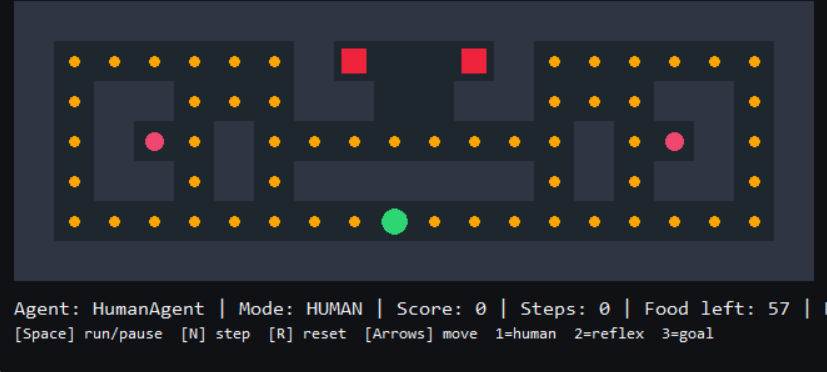

In [ ]:
maze = [
    ['#', '.', ' ', ' ', '#'],
    [' ', '.', '#', '.', ' '],
    [' ', ' ', ' ', '.', '#'],
    ['#', '.', '.', ' ', ' '],
    ['#', '#', '.', '#', ' '],
]

# TODO: Count the number of '.' symbols
food_count = 0

# Implement nested for-loops here


print("Total food:", food_count)


## 3) Iterative Control Using While Loops for Energy-Constrained Movement

Pac-Man traverses a single row of the maze from left to right.

Pac-Man begins at index `pos = 0` with an energy budget. Each step to the right consumes a fixed energy amount. The agent continues moving while (i) the next cell is not a wall and (ii) sufficient energy remains.

**Task**

Implement a loop that advances Pac-Man rightwards by one cell per iteration, printing the position and energy at each step. The loop must stop before entering a wall cell or when energy is depleted (`energy ≤ 0`).

**Expected Output**

```python
Step: pos=1, energy=25
Step: pos=2, energy=20
```

In [ ]:
row = [' ', '.', '.', '#', ' ']
pos = 0
energy = 30          # total energy points
cost_per_step = 5    # energy consumed per move

# TODO:
# Move right while the next cell is not a wall and energy > 0.
# After each move: decrement energy, print current pos and energy.

# Your code here



## 4) Functional Abstraction for Bounded Movement

The Pac-Man world is modeled as a rectangular grid (list of lists of characters), where:
- `'#'` denotes a wall (impassable),
- `'.'` denotes food,
- `' '` denotes empty space.

The agent is located at coordinates `(x, y)` (row `x`, column `y`). The objective is to implement `move_pacman(x, y, direction, maze)` such that the move is attempted in one of four directions: `'up'`, `'down'`, `'left'`, `'right'`, and succeeds only if the destination cell is inside bounds and not a wall.

**Task**

Implement a function with the signature:
```python
def move_pacman(x, y, direction, maze) -> (int, int, str)
```

Inputs:
- `x, y`: current integer coordinates (0-based indices).
- `direction`: one of {'up','down','left','right'}.
`maze`: list[list[str]] grid.

Output is a triple `(new_x, new_y, message)` where:
- `(new_x, new_y)` is the resulting position (equal to `(x, y)` if movement is blocked),
- `message` is a brief explanation (e.g., `"Moved to (r,c)"`, `"Blocked by wall"`, `"Blocked by border"`).

Constraints:
- Do not mutate the maze in this exercise.
- Do not use global variables; the function should rely solely on its parameters.

In [ ]:
def move_pacman(x, y, direction, maze):
    """
    Attempt to move Pac-Man one cell in `direction`.
    direction ∈ {'up','down','left','right'}
    maze: list of lists with symbols '#', '.', ' '
    Returns: (new_x, new_y, message)
    """
    # TODO: compute target; if wall or out-of-bounds -> stay; else move
    # return new_x, new_y, message
    pass

maze = [
  ['#',' ',' ','#'],-
  ['#','.', ' ','#'],
  ['#',' ',' ','#'],
  ['#','#','#','#']
]
pos = (1, 1)

# Example manual tests (after you implement):
# print(move_pacman(*pos, 'right', maze))
# print(move_pacman(*pos, 'up', maze))


## 5) Function/Conditional Synthesis for Display Mapping

In grid-based environments (e.g., Pac-Man), internal cell values often differ from what we show to users. For example, the program may internally store `'#'` (wall), `'.'` (food), and `' '` (empty) as canonical codes. A renderer then converts these codes to symbols for display.
A clean separation between representation (internal codes) and presentation (on-screen symbols) promotes modularity and clarity.

**Task**

Implement a function:
```python
def cell_symbol(cell: str) -> str
```

that returns a single-character display symbol according to the following mapping:

| Internal code | Meaning             | Display symbol |
| ------------- | ------------------- | -------------- |
| `'#'`         | Wall                | `'#'`          |
| `'.'`         | Food                | `'.'`          |
| `' '`         | Empty               | `' '` (space)  |
| *other*       | Unknown/unsupported | `'?'`          |

Constraints:
- The function must not mutate any external state.
- The function must return a string of length 1.
- Unknown inputs must be handled gracefully by returning `'?'`.

In [ ]:
def cell_symbol(cell):
    """
    Map an internal cell code to a one-character display symbol.

    Expected inputs: '#', '.', ' ' (space).
    Returns: '#', '.', ' ', or '?' for unknown codes.
    """
    # TODO: implement conditional mapping
    # return one of: '#', '.', ' ', '?'

print(cell_symbol('.'))  # expected: '.'
print(cell_symbol('x'))  # expected: '?'


## 6) Perception Abstraction via Functions

The world is a rectangular grid (list of lists of characters):
- `'#'` denotes a wall (impassable),
- `'.'` denotes food,
- `' '` denotes empty space.

The agent stands at `(r, c)` (row, column). The perception function must report immediate neighbors in the four directions using a consistent interface. This mirrors the local sensing used by reactive agents and serves as the input to the decision rules you implemented earlier.

Design choice (policy for edges): When a neighbor lies outside the grid, we will treat it as a wall '#'. This simplifies client code and prevents index errors.

**Task**

Write a function:
```python
def perceive(maze, pos):
    """
    maze: list[list[str]] — rectangular grid using '#', '.', ' '
    pos:  tuple[int, int] — (row, col)
    returns: dict[str, str] mapping each of {'up','down','left','right'} to the
             observed cell symbol in that direction; out-of-bounds → '#'
    """
```

In [ ]:
def perceive(maze, pos):
    """
    Return a dictionary with the contents of adjacent cells:
    {'up': ch, 'down': ch, 'left': ch, 'right': ch}
    Out-of-bounds neighbors are returned as '#'.
    """
    # TODO: implement bounds checking and neighbor lookup
    # Hints:
    # - let r, c = pos
    # - define a local helper or inline a get(r, c) that returns '#'
    #   when (r, c) is outside the maze
    pass



maze = [
  ['#',' ',' ','#'],
  ['#','.', ' ','#'],
  ['#',' ',' ','#'],
  ['#','#','#','#']
]
print(perceive(maze, (1, 1)))  # expect a dict with 4 keys


## 7) Rendering a Grid World with Lists

The agent’s position is the tuple `(r, c)` (row, column). The renderer must print each row of the maze, placing a `'P'` at the agent’s location without mutating the maze itself.

Rendering is a crucial step in simulation work: it provides observability for debugging and experimentation without requiring graphics libraries.

**Task**

Implement a function:
```python
def render(maze, P) -> None
```

that prints a textual view of `maze`, showing `'P'` at coordinate `P` and the raw cell symbols elsewhere. The function must not change the contents of `maze`; it should only read and print.

**Expected Output**
```python
####
#P #
# .#
####
```

In [ ]:
def render(maze, P):
    """
    Print a text visualization of the grid.
    `maze`: list[list[str]] using '#', '.', ' '
    `P`:    (row, col) tuple for agent position
    The function must not mutate `maze`.
    """
    # TODO: print each row; for cell (r,c), print 'P' if (r,c)==P else maze[r][c]
    # build each line as a string and then print it
    pass


# Example grid and probe
maze = [
  ['#','#','#','#'],
  ['#','.', ' ','#'],
  ['#',' ', '.','#'],
  ['#','#','#','#']
]
render(maze, (1, 1))   # agent at row 1, col 1


## 8) Path Recording with Lists of Tuples

We model the agent’s position as a tuple `(r, c)` (row, column). A move sequence describes intended directions (e.g., `['right','right','down','left']`). We will:
- Define a pure step function `apply_move(pos, direction)` that returns a new position without side effects.
- Iterate the given sequence of directions, updating the current position each time.
- Append each resulting position to a path list, thereby capturing the full path.

*(In this exercise, we ignore walls and borders to focus on data handling.)*

**Task**

Write code that:
- Implements `apply_move(pos, direction)` for the four cardinal directions.
- Iterates over a list of moves, producing a list `path` of positions after each move.
- Computes the set of unique positions visited.

In [ ]:
def apply_move(pos, direction):
    """
    pos: (row, col) tuple
    direction ∈ {'up','down','left','right'}
    returns a NEW (row, col) tuple after one step
    """
    r, c = pos
    if direction == 'up':    return (r - 1, c)
    if direction == 'down':  return (r + 1, c)
    if direction == 'left':  return (r, c - 1)
    if direction == 'right': return (r, c + 1)
    raise ValueError(f"Unknown direction: {direction!r}")


# Simulation inputs
start = (1, 1)
moves = ['right', 'right', 'down', 'left', 'left', 'up', 'up']

# TODO:
# 1) Iterate through moves, updating `pos` each time using apply_move
# 2) Append EACH resulting position to a `path` list
# 3) Compute `visited = set(path)` for unique positions
# 4) Print the final position, the full path, and the number of unique positions

# Your code here



## 9) Tuples: Immutability & Tuple Assignment

Show why tuples are immutable and use tuple unpacking to swap `(x,y)`.


In [ ]:
pos = (2, 3)
# TODO: try to assign pos[0] = 5 and catch the error
# then swap x,y using tuple assignment

# your code here


## 10) Dictionaries: Scoreboard Tracker

Multiple players (e.g., “Alice”, “Bob”, “Carol”) receive points based on events:
- coin → +10
- fruit → +50
- ghost → −50

Events are provided as a list of `(player, event)` pairs. Your task is to maintain a scoreboard and then output a ranking from highest to lowest score.

**Task**

Implement an event-processing pipeline that:
- Initializes a `scores` dictionary for players.
- Applies a sequence of events using a points lookup dictionary and safe lookups (`dict.get`).
- Produces a sorted ranking (descending by score).

In [ ]:
scores = {'Alice': 0, 'Bob': 0, 'Carol': 0}
events = [
  ('Alice','coin'),
  ('Bob','fruit'),
  ('Alice','coin'),
  ('Carol','ghost'),
  ('Bob','coin')
]

points = {'coin': 10, 'fruit': 50, 'ghost': -50}

# TODO:
# 1) For each (name, ev) in events, update scores[name] by points[ev]
#    Use .get(ev, 0) to unknown events.
# 2) Build a ranking list of (name, score) pairs, sorted by score descending.
# 3) Print the final scores and the ranking.

# Your code here



## 11) Nested Dictionaries: World State

A grid world can be modeled by mapping coordinate tuples `(r, c)` to cell records (nested dicts). Each cell record contains semantic fields, e.g.:
- `'type'` ∈ `{'wall','coin','ghost','empty'}`
- `'visited'` ∈ `{True, False}`

**Task**

Construct a world-state dictionary and perform typical queries/updates:
- Print all coordinates whose `'type'` is `'coin'`.
- Mark a specific coordinate as visited.
- Count how many cells have `'type' == 'ghost'`.

In [ ]:
world = {
  (1,1): {'type':'empty', 'visited': True},
  (1,2): {'type':'coin',  'visited': False},
  (1,3): {'type':'ghost', 'visited': False},
  (2,2): {'type':'coin',  'visited': False},
}

# TODO:
# 1) Print all coin coordinates
# 2) Mark (1,2) as visited
# 3) Count ghost cells

# Your code here
